In [1]:
from app import create_app, db
from app.instrument import Instrument
from app.analysis import Quote
mappings= {'BRK.B': 'BRK-B'}
with create_app().app_context():
    provided = ['SPLV', 'XLP']
    instruments = {b.symbol if b.symbol not in mappings else mappings[b.symbol]:
                   b for b in Instrument.find_stocks(200)}
    quote = Quote([*instruments.keys(), *provided], 120)
    quote.update_boosts(21, instruments)
    db.session.commit()
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-25 to 2019-06-25 - 202'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-mean'] > 0.8) & (stat['21-shrp'] > 0.8)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
PEP,64,4.213520,1.675955,2.414655,2.206724
KO,64,3.961007,1.639176,2.314785,3.383609
MCD,64,3.525930,1.466481,2.290696,2.999196
MA,64,4.388468,1.972010,2.140862,5.698715
WM,64,4.096225,2.146155,1.830976,3.316666
OKTA,64,14.323653,8.283349,1.709090,7.294949
SBUX,64,4.679448,2.977316,1.515721,4.600183
V,64,3.699709,2.435851,1.450434,4.317938
XLP,64,2.289914,1.524147,1.393073,4.021399


In [21]:
quote.setup_mask({*stat.index, *provided})
quote.least_correlated_portfolio(21, 5, provided, sr=2)

['SPLV', 'XLP'] -1.6762911309226114 0.4918335623375101 0.5992763411706671 1.3837005172153942
['SPLV', 'XLP', 'WMT', 'V', 'MCD'] -1.8252122359368326 0.45485120618276464 0.6661241506608685 1.4730937963902329
['SPLV', 'XLP', 'WMT', 'V', 'PEP'] -1.8440920584294367 0.5172537263343985 0.6344252581933356 1.4978855214785853
['SPLV', 'XLP', 'WMT', 'MCD'] -1.9652040608682229 0.3755549364551589 0.6167583117417351 1.4787586545325584
['SPLV', 'XLP', 'WMT', 'MCD', 'MA'] -2.0829579085654584 0.4180455918074202 0.7213552634450879 1.6111793819089832
['SPLV', 'XLP', 'WMT', 'MCD', 'WM'] -2.099043029344146 0.37328772851951114 0.6260733088395471 1.5492020333516023
['SPLV', 'XLP', 'WMT', 'MCD', 'PEP'] -2.337121588256533 0.41307864997640475 0.5816756091722581 1.665937923702598
['SPLV', 'XLP', 'V', 'MCD', 'PEP'] -2.4127661907935547 0.5358436688756141 0.6206648497610203 1.7846373547150947
['SPLV', 'XLP', 'MCD', 'MA', 'WM'] -2.492182442980239 0.3994979945729309 0.7202936622125288 1.8059870498828492
['SPLV', 'XLP

['SPLV', 'XLP', 'MCD', 'PEP', 'KO']

In [22]:
quote.setup_mask({*stat.index, *provided})
quote.least_correlated_portfolio(21, 8, provided + ['MCD', 'PEP', 'KO'], sr=0)

['SPLV', 'XLP', 'MCD', 'PEP', 'KO'] -0.12510644990097064 0.49160182946896225 0.5832917206300673 1.9575074856641905
['SPLV', 'XLP', 'MCD', 'PEP', 'KO', 'WMT'] -0.5585506751160477 0.4439326737932979 0.5975166510906544 1.7740791061799002
['SPLV', 'XLP', 'MCD', 'PEP', 'KO', 'WMT', 'MSFT'] -0.7942168718547308 0.4679333315457043 0.7378497965995648 1.6974752405489915
['SPLV', 'XLP', 'MCD', 'PEP', 'KO', 'WMT', 'MSFT', 'V'] -1.1458789425570004 0.5005540471262054 0.7535670103167945 1.6665951309579838
['SPLV', 'XLP', 'MCD', 'PEP', 'KO', 'WMT', 'MSFT', 'WEN'] -1.1762592661924103 0.4309785036128891 0.7927622301947009 1.6233008768772847
['SPLV', 'XLP', 'MCD', 'PEP', 'KO', 'WMT', 'MSFT', 'SMG'] -1.221105491677712 0.3694606011426555 0.8094339071796328 1.6061293131614895
['SPLV', 'XLP', 'MCD', 'PEP', 'KO', 'WMT', 'MSFT', 'WM'] -1.2303643272786502 0.44110043854288133 0.7285352341784688 1.7141627790588396
['SPLV', 'XLP', 'MCD', 'PEP', 'KO', 'WMT', 'MSFT', 'MAIN'] -1.2785784695293987 0.3306628173466337 0.

['SPLV', 'XLP', 'MCD', 'PEP', 'KO', 'MAIN', 'LMT', 'COST']

In [24]:
quote.setup_mask(['MCD', 'PEP', 'KO', 'MAIN', 'LMT', 'COST'])
quote.find_optimal_ratio(21, 4)

     fun: 1.002609957337945
     jac: array([2.00509712, 2.00587615, 2.00559007, 2.00455329, 3.61580747,
       2.00556064])
 message: 'Optimization terminated successfully.'
    nfev: 59
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 2.23635770e-01,  1.87238051e-01,  1.60827770e-01,  2.98594074e-01,
       -2.26801595e-18,  1.29704335e-01])


({'MCD': 0.22,
  'PEP': 0.19,
  'KO': 0.16,
  'MAIN': 0.3,
  'LMT': -0.0,
  'COST': 0.13},
 3.6344,
 1.0013)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,64.0,3.621277,1.007278,0.847282,3.027054,3.699267,4.242169,5.522838,3.429650,2.008154
PEP,64.0,4.213520,1.675955,0.437330,3.221889,4.435511,5.147362,7.553566,2.414655,2.206724
KO,64.0,3.961007,1.639176,0.387284,2.900776,3.902778,4.731334,8.396620,2.314785,3.383609
MCD,64.0,3.525930,1.466481,-0.558029,2.936136,3.754690,4.335780,6.412885,2.290696,2.999196
LMT,64.0,5.325569,4.606383,-3.207903,2.654662,5.261551,9.067968,14.118079,1.119946,5.015020
MAIN,64.0,3.045917,2.719197,-4.169665,1.466795,3.191682,5.214098,7.088367,1.058861,5.805606
COST,64.0,3.935056,3.890452,-2.314234,0.903589,3.422088,6.430357,13.413903,0.968625,4.141156


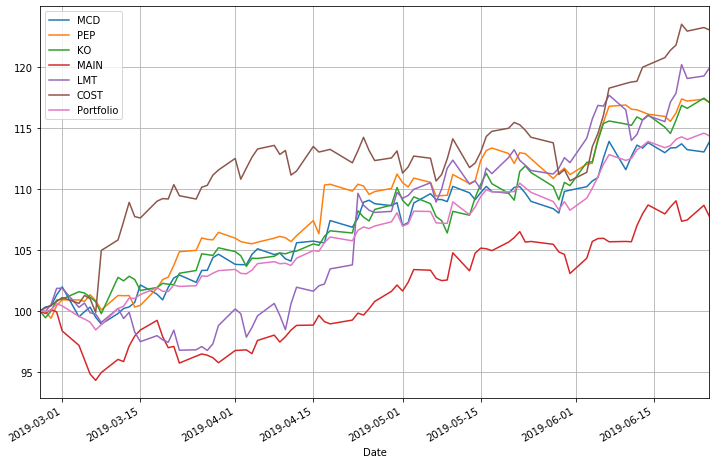

In [25]:
%pylab inline
quote.graph(21, {'MCD': 0.22,
  'PEP': 0.19,
  'KO': 0.16,
  'MAIN': 0.3,
  'LMT': -0.0,
  'COST': 0.13})